In [3]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1) Suno Research

In [36]:
with open('../src/crawlers/results/suno-petr4-20220423.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [37]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [38]:
df_suno.sample(5)

,topic,title,url,tags
date,,,,
2020-07-29 09:55:00,Negócios,Agenda do Dia: Vale; Petrobras; Magazine Luiza...,https://www.suno.com.br/noticias/agenda-do-dia...,"[agenda do dia, Cielo (CIEL3), CSN (CSNA3), Ma..."
2021-08-04 15:57:00,Negócios,Bolsonaro volta a falar em vale-gás da Petrobr...,https://www.suno.com.br/noticias/bolsonaro-vol...,"[Agências, gás, Jair Bolsonaro, Petrobras (PET..."
2021-06-15 19:23:00,Negócios,Petrobras (PETR4) receita Ivermectina a funcio...,https://www.suno.com.br/noticias/petrobras-pet...,[Petrobras (PETR4)]
2020-07-30 08:01:00,Negócios,Agenda do Dia: Cogna; Vale; AES Tietê; Petrobr...,https://www.suno.com.br/noticias/agenda-do-dia...,"[AES Tietê (TIET3/TIET4/TIET11), agenda do dia..."
2020-09-22 08:50:00,Negócios,Petrobras (PETR4) finaliza oferta de recompra ...,https://www.suno.com.br/noticias/petrobras-pet...,[Petrobras (PETR4)]


In [39]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-07-13 09:00:00 to 2022-04-22 11:27:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   1190 non-null   object
 1   title   1190 non-null   object
 2   url     1190 non-null   object
 3   tags    1190 non-null   object
dtypes: object(4)
memory usage: 46.5+ KB


C:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


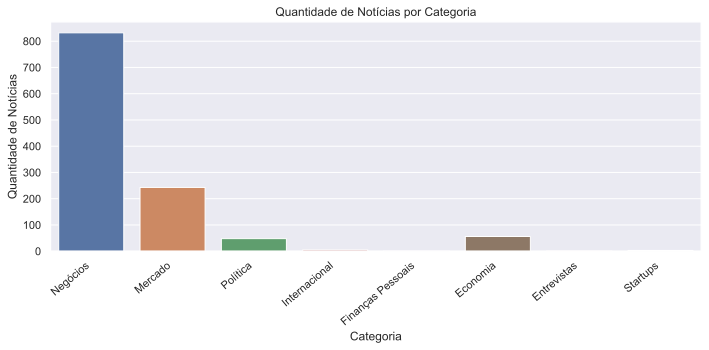

In [40]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [41]:
df_suno['topic'].value_counts()

Negócios             832
Mercado              243
Economia              56
Política              48
Internacional          5
Startups               3
Finanças Pessoais      2
Entrevistas            1
Name: topic, dtype: int64

In [42]:
print ('Suno Research')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))

Suno Research
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 292
Notícias em 2021: 712
Notícias em 2022: 186


In [43]:
print (f"Número Máximo de Notícias no Dia: {df_suno.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_suno.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_suno.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 16
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 1.8335901386748845


<AxesSubplot:xlabel='date'>

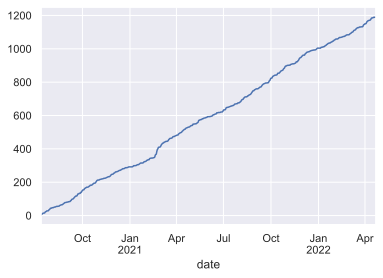

In [44]:
df_suno.resample('D').topic.count().cumsum().plot()

## 2. Twitter

In [26]:
with open('../src/crawlers/twitter/results/arkoadvice.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_twitter = pd.DataFrame(data)

In [27]:
# Convert date to datetime format
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_twitter.set_index('created_at', inplace=True)

# Order by date
df_twitter.sort_index(inplace=True)

In [28]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2020-12-26 15:20:30 to 2022-05-02 20:04:30
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        601 non-null    object
 1   search_dt       601 non-null    object
 2   text            601 non-null    object
 3   user_id         601 non-null    object
 4   screen_name     601 non-null    object
 5   rt_count        601 non-null    int64 
 6   favorite_count  601 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 37.6+ KB


In [29]:
df_twitter.head()

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2020-12-26 15:20:30,1342898093809872896,2022-05-03 14:15:34,TCU aprova estudos para leilão de 22 aeroporto...,1336365702698192896,arkoadvice,0,1
2020-12-26 17:17:32,1342927548448198661,2022-05-03 14:15:34,Ministro chama operadoras de telefonia para tr...,1336365702698192896,arkoadvice,0,1
2020-12-26 17:18:20,1342927749032386560,2022-05-03 14:15:34,"Nova Lei de Falências traz mudanças positivas,...",1336365702698192896,arkoadvice,0,2
2020-12-27 15:25:41,1343261789304352768,2022-05-03 14:15:34,Pesquisa: 32% dos japoneses querem cancelament...,1336365702698192896,arkoadvice,0,1
2020-12-27 15:26:08,1343261901577400321,2022-05-03 14:15:34,Brasil e Reino Unido estreitam diálogo econômi...,1336365702698192896,arkoadvice,0,1


<AxesSubplot:xlabel='created_at'>

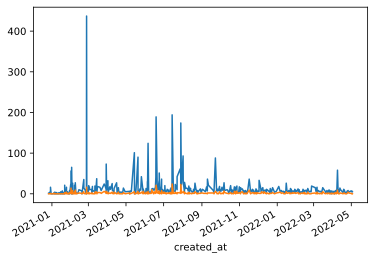

In [30]:
df_twitter.favorite_count.plot()
df_twitter.rt_count.plot()

---